<a href="https://colab.research.google.com/github/AngleKit/HomeworkPython/blob/main/Assignments/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MSE/CHE 7530/5995 - Assignment #7  
This assignment will be due on **Wednesday, November 19th at 2:30 pm**. There are three main portions of this assignment:
1. Demonstrate the simulation of Fresnel's equations, along with a qualitative discussion of how refellips generates the data.  
2. Experimentation with possible fit parameters and fitting a dataset in refellips.  
3. Quantitative simulation (yourself) of X-ray reflectivity in the kinematical approximation.

<font size=5> 7530 grade will be taken out of 100 points, 5995 grade taken out of 75 points (up to 100%).

## Part 0.5 - Imports

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
! pip install refnx
! pip install refellips

In [8]:
import refellips as se

In [9]:
import sys
import os
from os.path import join as pjoin
import numpy as np
import matplotlib.pyplot as plt
import scipy

import refnx
from refnx.analysis import CurveFitter
from refnx.reflect import Slab

import refellips
from refellips.dataSE import DataSE, open_EP4file
from refellips.reflect_modelSE import ReflectModelSE
from refellips.objectiveSE import ObjectiveSE
from refellips.dispersion import RI, Cauchy, load_material

In [10]:
! git clone https://github.com/cbishop4/MSE7530/

fatal: destination path 'MSE7530' already exists and is not an empty directory.


## Help for Questions (Not graded - for your own information)

### Question 1 Help.

Question 1 will require you to use the beginning functions in refellips. This is designed so that you can learn a little more about what the code is fundamentally doing.

For the first question, you will be modeling data for a polymer on Si/SiO2. Here, we will illustrate the principles with Polystyrene. Polystyrene exists in the "materials" folder in the refellips code. (https://github.com/refnx/refellips/tree/main/refellips/materials)

In [11]:
# load up all the materials you will use
air = load_material('air')
silicon = load_material('silicon')
sio2 = load_material('silica')
PS = load_material('polystyrene')

In [12]:
# make a model structure, specifying the thickness of each layer
structure = air | PS(3000.) | sio2(25.) | silicon
# turn the structure into a model
model = ReflectModelSE(structure)

For this question, rather than proceeding all the way to making an objective function, we are just going to simulate the psi and delta that would be generated by performing ellipsometry on this model film. We need to specify which wavelengths and incident angles we will simulate the data at; you want this to be the same as your data. For the sake of argument, I will use only 70 degree incident angles. The format must be a 2D array, with the first column wavelengths and the second column Angles of incidence.

In [13]:
msmt_wl = np.linspace(250., 1000., 50)
AOIs = np.ones(50) * 70.
msmts = np.column_stack((msmt_wl, AOIs))
msmts

array([[ 250.        ,   70.        ],
       [ 265.30612245,   70.        ],
       [ 280.6122449 ,   70.        ],
       [ 295.91836735,   70.        ],
       [ 311.2244898 ,   70.        ],
       [ 326.53061224,   70.        ],
       [ 341.83673469,   70.        ],
       [ 357.14285714,   70.        ],
       [ 372.44897959,   70.        ],
       [ 387.75510204,   70.        ],
       [ 403.06122449,   70.        ],
       [ 418.36734694,   70.        ],
       [ 433.67346939,   70.        ],
       [ 448.97959184,   70.        ],
       [ 464.28571429,   70.        ],
       [ 479.59183673,   70.        ],
       [ 494.89795918,   70.        ],
       [ 510.20408163,   70.        ],
       [ 525.51020408,   70.        ],
       [ 540.81632653,   70.        ],
       [ 556.12244898,   70.        ],
       [ 571.42857143,   70.        ],
       [ 586.73469388,   70.        ],
       [ 602.04081633,   70.        ],
       [ 617.34693878,   70.        ],
       [ 632.65306122,   

We can find the simulated psi and delta just by calling the model with the specified measurement conditions.

In [14]:
simulated = model(msmts)
simulated

(array([41.71531097, 36.57083035, 34.24342842, 36.85966413, 46.21892856,
        76.14482276, 47.19284424, 37.61710096, 31.23513623, 23.79779691,
        19.5907202 , 20.78040339, 24.81472638, 29.38548841, 34.48859888,
        41.40781126, 52.40026818, 70.1001715 , 78.3928087 , 61.04985509,
        48.68026275, 40.91375757, 35.75061063, 31.85469798, 28.60125819,
        25.69426054, 23.00898092, 20.46152439, 18.0335678 , 15.74772629,
        13.65863576, 11.86171638, 10.46811469,  9.60260515,  9.34178452,
         9.66086236, 10.43020653, 11.49069306, 12.74218458, 14.1003305 ,
        15.47889117, 16.84881166, 18.17380208, 19.46439244, 20.71097791,
        21.91757964, 23.08034197, 24.21158435, 25.31697371, 26.38402792]),
 array([ 76.39936536, 118.11971691, 200.45154084, 257.58138916,
        267.17586053, 167.82218869,  82.94768793,  85.29096478,
        107.79051749, 140.93568059, 182.54668794, 226.13904864,
        254.37495197, 271.13307196, 280.80197096, 285.76635083,
        288.

In [15]:
psis = simulated[0]; deltas = simulated[1]

Text(0.5, 0.98, 'Simulated Ellipsometric Angles for 300 nm Polystyrene')

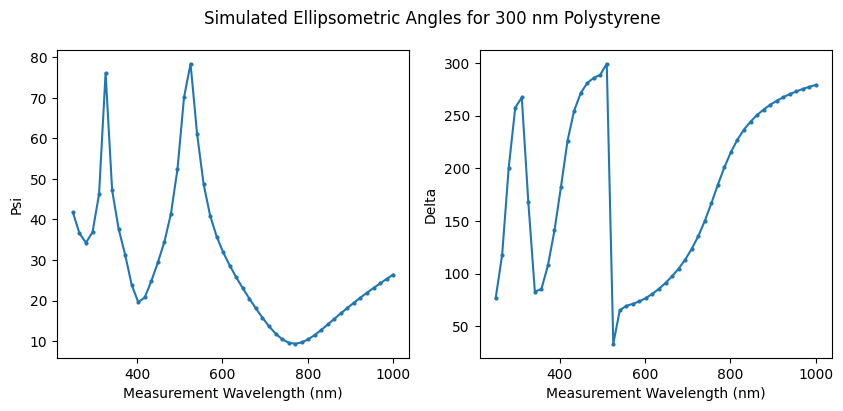

In [16]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(msmt_wl, psis,'-o',markersize=2)
ax[1].plot(msmt_wl, deltas,'-o',markersize=2)
for a in ax:
  a.set_xlabel('Measurement Wavelength (nm)')
ax[0].set_ylabel('Psi'); ax[1].set_ylabel('Delta')
plt.suptitle('Simulated Ellipsometric Angles for 300 nm Polystyrene')

Recall that the formula for the MSE is $MSE = \frac{1}{n}\sum_{i=1}^{n}{(Data - Model)^2} $

### Question 2 Help.
In this question, you will use the full functionality of RefEllips to determine the optical constants of a polymer and link it to a physical meaning. For full functionality of refellips, see the demo that we used in class, "Ellipsometry.ipynb".

An important difference in this question is that you will not **only** be varying thickness, but you will also need to fit for an A value. Do not fit the B parameter; assume it to be fixed at 0.003, and C fixed at 0.

In [17]:
si = load_material('silicon')
air = load_material('air')
sio2 = load_material('silica')
fitpol = Cauchy(A=1.7, B = 0.003)

Below is the notation for how you set the option to vary the A parameter.

In [18]:
fitlayer = fitpol(5000.) # needs some thickness to initialize
fitlayer.thick.setp(value=9000., vary=True, bounds=(0.,10000.))
fitlayer.ri.A.setp(value=1.7, vary=True,bounds=(1.0,2.0))

After this, make the structure and proceed as usual. This table will give you information to help make the final determination of PC content. Use only the A parameters.

Cauchy Parameters for PMMA and PC

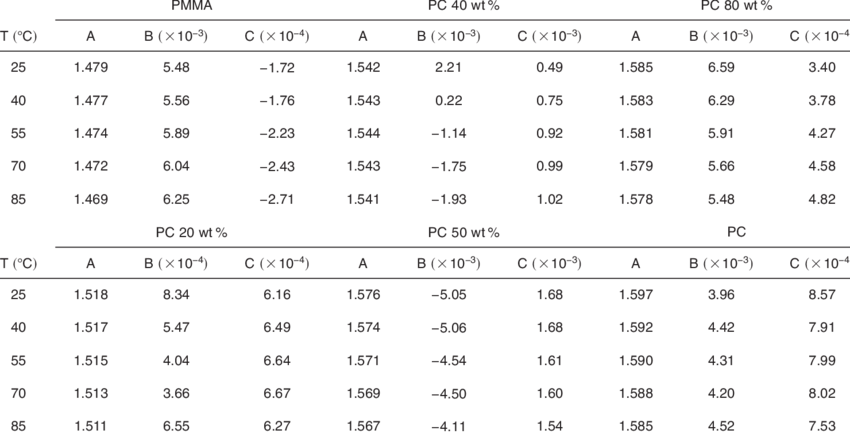

https://www.spiedigitallibrary.org/journals/optical-engineering/volume-48/issue-12/124603/Refractive-index-control-in-bicomponent-polymer-films-for-integrated-thermo/10.1117/1.3275452.short

## Questions (Only work below this line will be graded)

### Question 1. Using refellips, model the $\Psi$ and $\Delta$ values for a film of PNIPAM on Silicon with a 2 nm native oxide layer. (25 points)

#### Part A.  Make 2 graphs - one of $\Psi$ vs. wavelength, and one of $\Delta$ vs. wavelength, from 50 to 600 nm-thick in increments of 50 nm at $70°$ angle of incidence.

In [23]:
air = load_material('air')
silicon = load_material('silicon')
sio2 = load_material('silica')
PNIPAM = load_material('pnipam')

#structure1 = air | PNIPAM(3000.) | sio2(20.) | silicon
# turn the structure into a model
#model1 = ReflectModelSE(structure1)

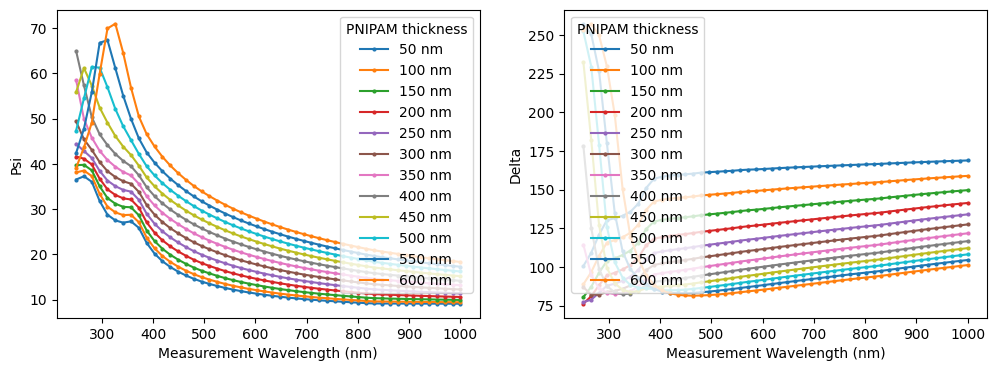

In [29]:
msmt_wl = np.linspace(250., 1000., 50)
AOIs = np.ones(50) * 70.
msmts = np.column_stack((msmt_wl, AOIs))

# thicknesses
#thick = np.linspace(50., 650., 50.)
thick = np.arange(50., 650., 50.)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for t in thick:
  # make a model structure, specifying the thickness of each layer
  structure = air | PNIPAM(t) | sio2(2.) | silicon
  # turn structure into model
  model = ReflectModelSE(structure)

  # simulate psi and delta
  simulated = model(msmts)
  psis = simulated[0]
  deltas = simulated[1]

  # plot
  ax[0].plot(msmt_wl, psis, '-o', markersize=2, label=f"{t:.0f} nm")
  ax[1].plot(msmt_wl, deltas, '-o', markersize=2, label=f"{t:.0f} nm")

# axis labels
ax[0].set_xlabel('Measurement Wavelength (nm)')
ax[1].set_xlabel('Measurement Wavelength (nm)')
ax[0].set_ylabel('Psi')
ax[1].set_ylabel('Delta')

# legends
ax[0].legend(title="PNIPAM thickness")
ax[1].legend(title="PNIPAM thickness")

plt.show()


#### Part B. For each of the curves that you manually generated in Part A, calculate the mean-squared error (MSE) between your curve and the experimental data contained in the given file, 'PNIPAM_q1.txt'

In [34]:
dataPNI = '/content/MSE7530/sampledata/PNIPAM_q1.txt'
exp_data = np.loadtxt(dataPNI, skiprows=1)
#data
wl_exp = exp_data[:,0]
psi_exp = exp_data[:,1]
delta_exp = exp_data[:,2]

MSE_results = {}

In [37]:
for t in thick:
    # make a model structure, specifying the thickness of each layer
  structure = air | PNIPAM(t) | sio2(2.) | silicon
  # turn structure into model
  model = ReflectModelSE(structure)

  # simulate psi and delta
  simulated = model(msmts)
  psis = simulated[0]
  deltas = simulated[1]

  mse_psi = np.mean((psis - psi_exp)**2)
  mse_delta = np.mean((deltas - delta_exp)**2)
  total_mse = mse_psi + mse_delta
  MSE_results[t] = total_mse

#print(MSE_results)

{np.float64(600.0): np.float64(9021.781166664388), np.float64(50.0): np.float64(18464.605984134367), np.float64(100.0): np.float64(15412.647570469402), np.float64(150.0): np.float64(12976.241306065589), np.float64(200.0): np.float64(11067.408825324166), np.float64(250.0): np.float64(9579.338740958017), np.float64(300.0): np.float64(8427.808235965518), np.float64(350.0): np.float64(7593.884597752146), np.float64(400.0): np.float64(7250.409741351182), np.float64(450.0): np.float64(7387.637278866897), np.float64(500.0): np.float64(7722.4975988539145), np.float64(550.0): np.float64(8248.63641721126)}


### Question 2. Using the full functions of refellips as demonstrated in class, determine the percentage of Polycarbonate (PC) in a PMMA-PC blend. **You must show your work for full credit**; use as many cells of code and/or text as necessary. (50 points)

In [ ]:
datafile = '/content/MSE7530/sampledata/sim_ellipsometry.txt'

#### Bonus Question: Examine the values in the table. Why should you not trust this data? (The A parameters are fine)

### Question 3. Using the equations and tables in Chapter 3 of Als-Nielsen and McMorrow, simulate the kinematical reflectivity from a 15-nm film of Ge on top of Silicon and plot it here for Q = 0 to 1.0 A^-1. Ignore any native oxide. (25 points)
<font size=3><font color='red'> You must show your work starting from the equations and parameters; you may do this all in code, or you may do it all by hand, in which case you should turn in an additional PDF of your derivations. The final reflectivity should be plotted in this notebook. (i.e., you can use pencil and paper to get to a final equation that you enter into the Notebook)